In [3]:
import numpy as np
from cosmoTransitions import generic_potential_1
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize,stats
import scipy.integrate as integrate
import random
import seaborn as sns
from scipy import interpolate, special




%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (8, 6)  #set default figure size

#plt.rcParams["figure.figsize"] = (8, 6)  #set default figure size
#pd.set_option('display.max_rows', None)
thick_size=16
label_size=20




####Some definitions##
v2 = 246.2**2
mh=125.09
v=246.2
alpha=1/137
sinthw=np.sqrt(0.223)
g1=np.sqrt(4*np.pi*alpha/(1-sinthw**2)) ##U(1)_Y gauge coupling (also the electron charge in dimensionless units)
g=np.sqrt(4*np.pi*alpha)/sinthw
Mplanck=2.4*10**18
cs=1/3**0.5 ##Sound speed constant
del alpha


####This code uses an interpoaltion function for the number of degrees of freedom as function of temperature
###Data is obtained from https://member.ipmu.jp/satoshi.shirai/EOS2018
data = np.loadtxt( 'satoshi_dof.dat' )
Temperature_d=(data.T)[0][900:3900]
dof_d=(data.T)[1][900:3900]
#f = interpolate.interp1d(Temperature_d, dof_d)###"""the function works from T=[10e-4,1000]"""
g_star = interpolate.interp1d(Temperature_d, dof_d, kind='cubic')




In [10]:
df12=pd.read_csv("SCANS/scan_cluster_0/On_Shell_12.csv",index_col=[0])
df13=pd.read_csv("SCANS/scan_cluster_0/On_Shell_13.csv",index_col=[0])
df14=pd.read_csv("SCANS/scan_cluster_0/On_Shell_14.csv",index_col=[0])
df15=pd.read_csv("SCANS/scan_cluster_0/On_Shell_15.csv",index_col=[0])
df16=pd.read_csv("SCANS/scan_cluster_0/On_Shell_16.csv",index_col=[0])
df17=pd.read_csv("SCANS/scan_cluster_0/On_Shell_17.csv",index_col=[0])
df18=pd.read_csv("SCANS/scan_cluster_0/On_Shell_18.csv",index_col=[0])
df19=pd.read_csv("SCANS/scan_cluster_0/On_Shell_19.csv",index_col=[0])
df20=pd.read_csv("SCANS/scan_cluster_0/On_Shell_20.csv",index_col=[0])
df21=pd.read_csv("SCANS/scan_cluster_0/On_Shell_21.csv",index_col=[0])
df22=pd.read_csv("SCANS/scan_cluster_0/On_Shell_22.csv",index_col=[0])
df23=pd.read_csv("SCANS/scan_cluster_0/On_Shell_23.csv",index_col=[0])
df24=pd.read_csv("SCANS/scan_cluster_0/On_Shell_24.csv",index_col=[0])
df25=pd.read_csv("SCANS/scan_cluster_0/On_Shell_25.csv",index_col=[0])
df26=pd.read_csv("SCANS/scan_cluster_0/On_Shell_26.csv",index_col=[0])
df27=pd.read_csv("SCANS/scan_cluster_0/On_Shell_27.csv",index_col=[0])
df28=pd.read_csv("SCANS/scan_cluster_0/On_Shell_28.csv",index_col=[0])
df29=pd.read_csv("SCANS/scan_cluster_0/On_Shell_29.csv",index_col=[0])
df30=pd.read_csv("SCANS/scan_cluster_0/On_Shell_30.csv",index_col=[0])
df31=pd.read_csv("SCANS/scan_cluster_0/On_Shell_31.csv",index_col=[0])
df32=pd.read_csv("SCANS/scan_cluster_0/On_Shell_32.csv",index_col=[0])
df33=pd.read_csv("SCANS/scan_cluster_0/On_Shell_33.csv",index_col=[0])
df34=pd.read_csv("SCANS/scan_cluster_0/On_Shell_34.csv",index_col=[0])
df35=pd.read_csv("SCANS/scan_cluster_0/On_Shell_35.csv",index_col=[0])
df36=pd.read_csv("SCANS/scan_cluster_0/On_Shell_36.csv",index_col=[0])
df37=pd.read_csv("SCANS/scan_cluster_0/On_Shell_37.csv",index_col=[0])
df38=pd.read_csv("SCANS/scan_cluster_0/On_Shell_38.csv",index_col=[0])
df39=pd.read_csv("SCANS/scan_cluster_0/On_Shell_39.csv",index_col=[0])
df40=pd.read_csv("SCANS/scan_cluster_0/On_Shell_40.csv",index_col=[0])
df41=pd.read_csv("SCANS/scan_cluster_0/On_Shell_41.csv",index_col=[0])
df42=pd.read_csv("SCANS/scan_cluster_0/On_Shell_42.csv",index_col=[0])
df43=pd.read_csv("SCANS/scan_cluster_0/On_Shell_43.csv",index_col=[0])


df_total=pd.concat([df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,
           df26,df27,df28,df29,df30,df31,df32,df33,df34,df35,df36,df37,df38,df39,
           df40,df41,df42,df43])

df_total=df_total[df_total.alpha_max>1e-4]
#df_total=df_total[df_total.alpha_max<1e-0]
df_total=df_total[df_total.num_FOPT>=1]
#df_total=df_total[df_total.lams>.5]
#df_total=df_total[df_total.lams<1]
#df_total=df_total[df_total.lamh>.75]
#df_total=df_total[df_total.lamh<.8]

df=df_total
len(df)

5121

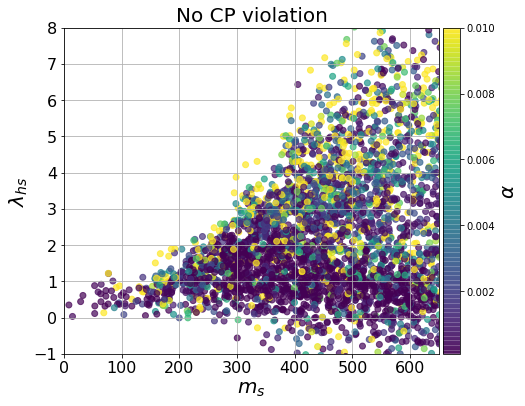

In [16]:


plt.scatter(df.ms,df.lammix,c=df.alpha_0,alpha=.7)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')
plt.clim(1e-4,.01)
plt.xlim(0,650)
plt.ylim(-1,8)
plt.grid(True)
plt.xlabel("$m_s$",size=label_size)
plt.ylabel("$\\lambda_{hs}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.title("No CP violation",size=label_size)
plt.show()

In [373]:
dphi0=((df['h_low_0']-df['h_high_0'])**2+1*(df['s_low_0']-df['s_high_0'])**2)**.5
dphi1=((df['h_low_1']-df['h_high_1'])**2+1*(df['s_low_1']-df['s_high_1'])**2)**.5
dphi2=((df['h_low_2']-df['h_high_2'])**2+1*(df['s_low_2']-df['s_high_2'])**2)**.5
df["dphi0"]=dphi0
df["dphi1"]=dphi1
df["dphi2"]=dphi2
dphi_max=df[["dphi0","dphi1","dphi2"]].apply(max,axis=1)
df["dphi_max"]=dphi_max

In [374]:
df.columns


Index(['ms', 'theta', 'u', 'muhs', 'mu3', 'lamh', 'lams', 'lammix', 'muh2',
       'mus2', 'Pih', 'Pis', 'lamh_tilde', 'th_bool', 'h_low_0', 's_low_0',
       'h_high_0', 's_high_0', 'Tnuc_0', 'dT_0', 'alpha_0', 'vwf_0', 'xi_J_0',
       'v_calculable_0', 'num_FOPT', 'alpha_max', 'dT_max', 'tran_type',
       'h_low_1', 's_low_1', 'h_high_1', 's_high_1', 'Tnuc_1', 'dT_1',
       'alpha_1', 'vwf_1', 'xi_J_1', 'v_calculable_1', 'h_low_2', 's_low_2',
       'h_high_2', 's_high_2', 'Tnuc_2', 'dT_2', 'alpha_2', 'vwf_2', 'xi_J_2',
       'v_calculable_2', 'h_low_3', 's_low_3', 'h_high_3', 's_high_3',
       'Tnuc_3', 'dT_3', 'alpha_3', 'vwf_3', 'xi_J_3', 'v_calculable_3',
       'dphi0', 'dphi1', 'dphi2', 'dphi_max'],
      dtype='object')

In [375]:
Columns=['ms', 'theta', 'u', 'muhs', 'mu3', 'lamh', 'lams', 'lammix', 'muh2',
       'mus2', 'Pih', 'Pis', 'lamh_tilde',"alpha_max","dT_max","dphi_max"]

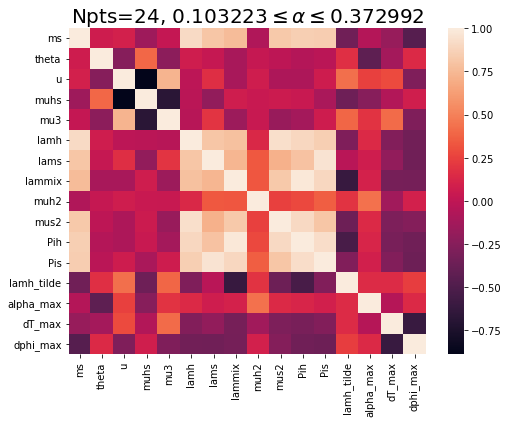

In [376]:

sns.heatmap(df[Columns].corr())
title="Npts="+str(len(df))+", "+str(round(df.alpha_max.min(),6))+"$\leq \\alpha \leq$"+str(round(df.alpha_max.max(),6))
plt.title(title,size=label_size)
plt.show()

In [377]:
stats.pearsonr(df['lammix'], df['alpha_max'])

(0.1034543522809558, 0.6304745089402808)

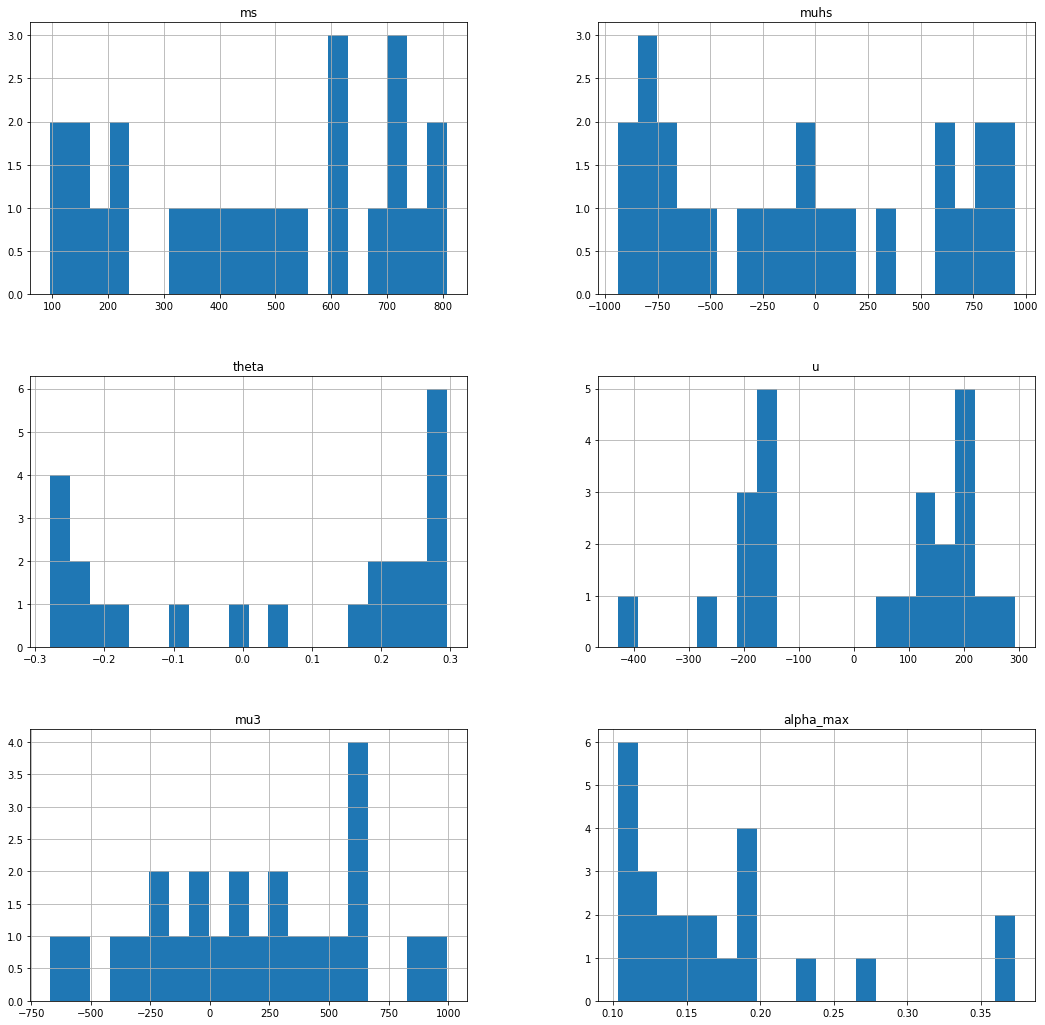

In [380]:
df[["ms","muhs","theta","u","mu3","alpha_max"]].hist(figsize=(18,18),bins=20)
plt.show()

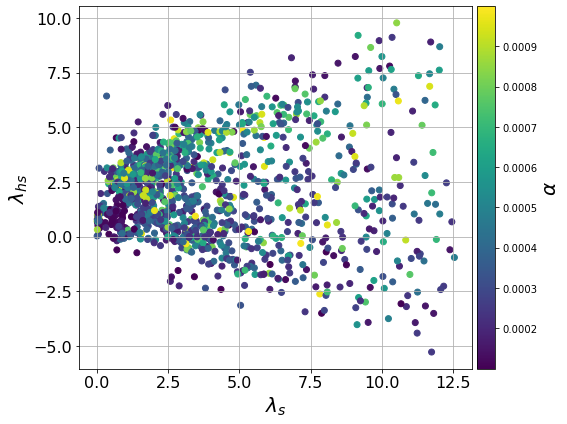

In [170]:

plt.scatter(df.lams,df.lammix,c=(df.alpha_max))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')


plt.xlabel("$\\lambda_s$",size=label_size)
plt.ylabel("$\\lambda_{hs}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=7)

#plt.legend(prop={'size': label_size})
#plt.title("CP violation",size=label_size)
plt.grid(True)
plt.tight_layout()
#plt.savefig('SCANS/bubble_PLOTS/bubble_vw_alpha_CP.pdf', dpi=300)
plt.show()

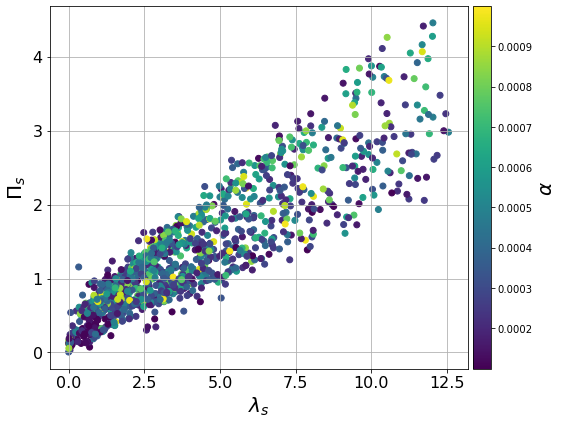

In [171]:

plt.scatter(df.lams,df.Pis,c=(df.alpha_max))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')


plt.xlabel("$\\lambda_s$",size=label_size)
plt.ylabel("$\\Pi_s$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=7)

#plt.legend(prop={'size': label_size})
#plt.title("CP violation",size=label_size)
plt.grid(True)
plt.tight_layout()
#plt.savefig('SCANS/bubble_PLOTS/bubble_vw_alpha_CP.pdf', dpi=300)
plt.show()

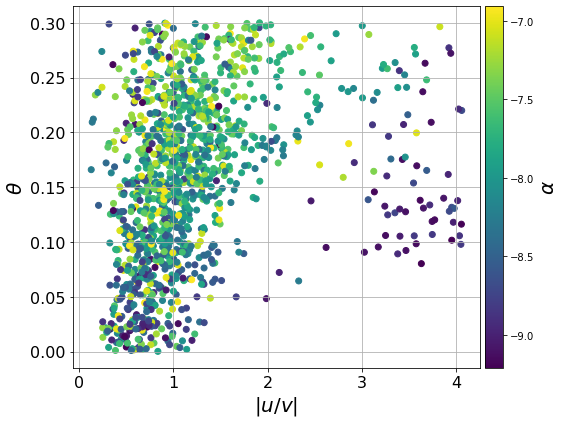

In [172]:
plt.scatter(abs(df.u/v),abs(df.theta),c=np.log(df.alpha_max))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')


plt.xlabel("$|u/v|$",size=label_size)
plt.ylabel("$\\theta$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=7)

#plt.legend(prop={'size': label_size})
#plt.title("CP violation",size=label_size)
plt.grid(True)
plt.tight_layout()
#plt.savefig('SCANS/bubble_PLOTS/bubble_vw_alpha_CP.pdf', dpi=300)
plt.show()

In [153]:
df=df.sort_values("alpha_max")
modi=-6
[ms_val,u_val,muhs_val,mu3_val]=df.iloc[modi].ms,df.iloc[modi].u,df.iloc[modi].muhs,df.iloc[modi].mu3

In [154]:
ms_range=np.logical_and(df.ms<ms_val*(1+np.sign(ms_val)*.1),df.ms>ms_val*(1-np.sign(ms_val)*.1))
#u_range=np.logical_and(df.u<u_val*(1+np.sign(u_val)*.5),df.u>u_val*(1-np.sign(u_val)*.5))
muhs_range=np.logical_and(df.muhs<muhs_val*(1+np.sign(muhs_val)*.1),df.muhs>muhs_val*(1-np.sign(muhs_val)*.1))
mu3_range=np.logical_and(df.mu3<mu3_val*(1+np.sign(mu3_val)*.9),df.mu3>mu3_val*(1-np.sign(mu3_val)*.9))

logical_1=np.logical_and(ms_range,muhs_range)
logical_2=np.logical_and(logical_1,mu3_range)


In [278]:
# df1=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new1.csv",index_col=[0])
# df2=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new2.csv",index_col=[0])
# df3=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new3.csv",index_col=[0])
# df4=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new4.csv",index_col=[0])
# df5=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new5.csv",index_col=[0])
# df6=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new6.csv",index_col=[0])
# df7=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new7.csv",index_col=[0])
# df8=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new8.csv",index_col=[0])
# df9=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new9.csv",index_col=[0])
# df10=pd.read_csv("SCANS/scan_cluster_1/full_model_vw_solutions_new10.csv",index_col=[0])

df11=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new11.csv",index_col=[0])
df12=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new12.csv",index_col=[0])
df13=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new13.csv",index_col=[0])
df14=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new14.csv",index_col=[0])
df15=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new15.csv",index_col=[0])
df16=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new16.csv",index_col=[0])
df17=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new17.csv",index_col=[0])
df18=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new18.csv",index_col=[0])
df19=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new19.csv",index_col=[0])
df20=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new20.csv",index_col=[0])
df21=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new21.csv",index_col=[0])
df22=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new22.csv",index_col=[0])
df23=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new23.csv",index_col=[0])
df24=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new24.csv",index_col=[0])
df25=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new25.csv",index_col=[0])
df26=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new26.csv",index_col=[0])
df27=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new27.csv",index_col=[0])
df28=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new28.csv",index_col=[0])
df29=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new29.csv",index_col=[0])
df30=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new30.csv",index_col=[0])
df31=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new31.csv",index_col=[0])
df32=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new32.csv",index_col=[0])
df33=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new33.csv",index_col=[0])
df34=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new34.csv",index_col=[0])
df35=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new35.csv",index_col=[0])
df36=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new36.csv",index_col=[0])
df37=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new37.csv",index_col=[0])
df38=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new38.csv",index_col=[0])
df39=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new39.csv",index_col=[0])
df40=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new40.csv",index_col=[0])
df41=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new41.csv",index_col=[0])
df42=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new42.csv",index_col=[0])
df43=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new43.csv",index_col=[0])
df44=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new44.csv",index_col=[0])
df45=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new45.csv",index_col=[0])
df46=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new46.csv",index_col=[0])
df47=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new47.csv",index_col=[0])
df48=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new48.csv",index_col=[0])
df49=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new49.csv",index_col=[0])
df50=pd.read_csv("SCANS/scan_cluster_2/full_model_vw_solutions_new50.csv",index_col=[0])

df_total=pd.concat([df12,df13,df14,df15,df16,df17,df18,df19,df20,
                    df21,df22,df23,df24,df26,df27,df28,df29,
                    df30,df31,df32,df33,df34,df35,df36,df37,df38,
                    df39,df40,df41,df42,df43,df44,df45,df46,df47,
                    df48,df49,df50])
df_total=df_total[df_total["vel_converged"]==True]

df=df_total

In [146]:
#df=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/smal_angle_results.csv.csv",index_col=[0])
#df=df_total
#df=df[['Lam_CP', 'Tnuc_0', 'Tp/TN', 'vw', 'vp', 'h0', 'Lh', 'Ls', 'ds','shigh', 'slow', 'alpha_p', 'ms']]
#df.to_csv("SCANS/computeBAU.csv")

#df_BAU = pd.read_csv('SCANS/BAU/BAU_top_fullmodel_3.csv', names=["eta_bau"], header=None)
#df["eta_BAU"]=list(df_BAU.eta_bau)

#df.to_csv("SCANS/BAU/sols_fullmodel_2.csv")


#BAUcolumns=['ms', 'theta', 'u', 'muhs', 'mu3', 'lamh', 'lams', 'lammix',
#            'Tc_0','Tmin_0', 'Tnuc_0','alpha_Tp_0','beta_Tp_0',"volume_shrinks_0",
#            'vw','Lh', 'dh', 'h0', 'Ls', 'ds', 'shigh', 'slow',
#            'Type', 'alpha_p', 'vm', 'vp', 'xi_s', 'Tp/TN', 'vel_converged','yt','Lam_CP','eta_BAU']

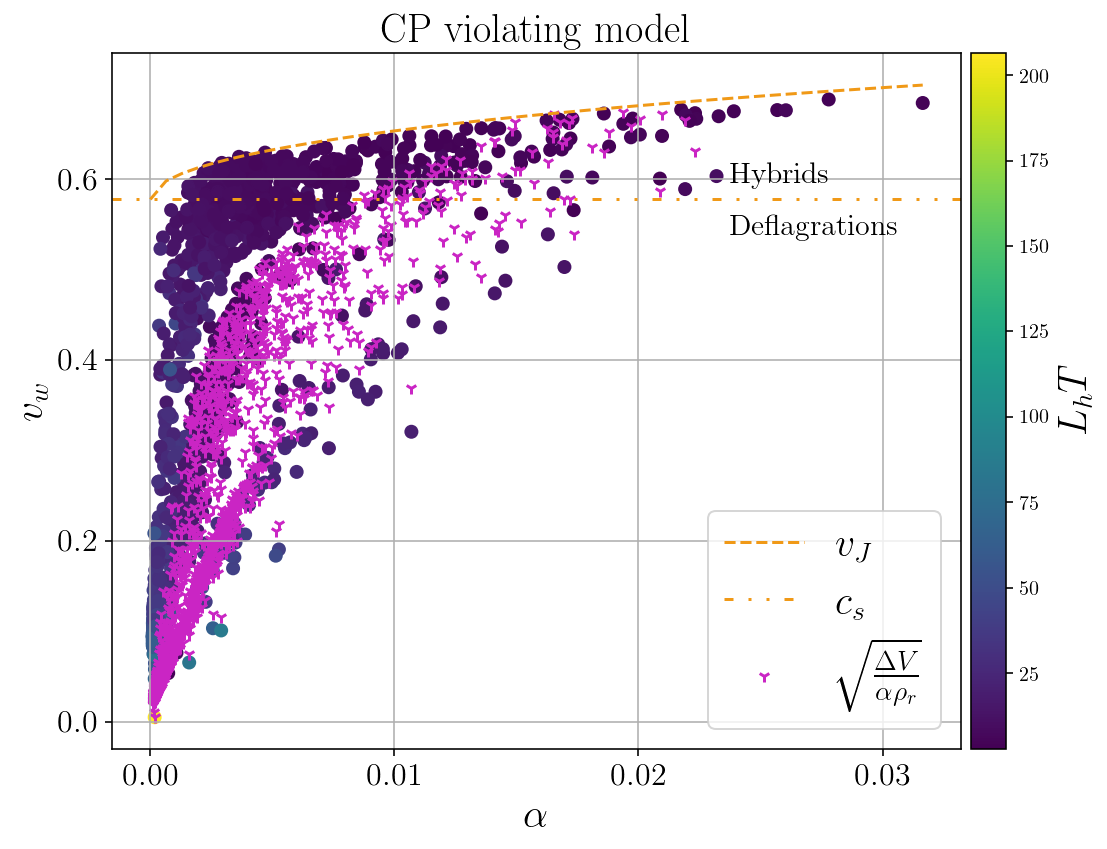

In [7]:
df=pd.read_csv("SCANS/results_cluster.csv",index_col=[0])
df=df[df.EWSBtree==True]
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
df=df[df.h_low_0>20]
df=df.drop(1455)

###After LHC limits
df=pd.read_csv("SCANS/CP_violating_results_filtered.csv",index_col=[0])


v_J=lambda alpha_p:((alpha_p*(2+3*alpha_p))**0.5+1)/(3**0.5*(1+alpha_p))
al_range=np.linspace(0,df.alpha_max.max())



thick_size=16
label_size=20
#plt.rcParams['text.usetex'] = True

plt.scatter(df.alpha_0,df.vw,c=df.Lh*df.Tnuc_0)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$L_h T$", size=label_size, weight='bold')
#plt.plot(df.alpha_0,df.xi_J_0,c="#f09917",label="$v_J$",linestyle="--")
plt.plot(al_range,v_J(al_range),c="#f09917",label="$v_J$",linestyle="--")
df=df[df.vwf_0<=df.xi_J_0]
plt.scatter(df.alpha_0,df.vwf_0,c="#CA25C4",marker="1",label="$\\sqrt{\\frac{\\Delta V}{\\alpha \\rho_r}}$")
plt.axhline(y=cs,linestyle=(0, (3, 5, 1, 5, 1, 5)),c="#f09917",label="$c_s$")
plt.figtext(.64, .78, "Hybrids", fontsize=15)
plt.figtext(.64, .72, "Deflagrations", fontsize=15)

plt.legend(prop={'size': label_size})
plt.xlabel("$\\alpha$",size=label_size)
plt.ylabel("$v_w$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=7)
plt.title("CP violating model",size=label_size)
plt.grid(True)

plt.tight_layout()
plt.savefig('SCANS/BAU_plots/PLOT1.pdf', dpi=300)
plt.show()


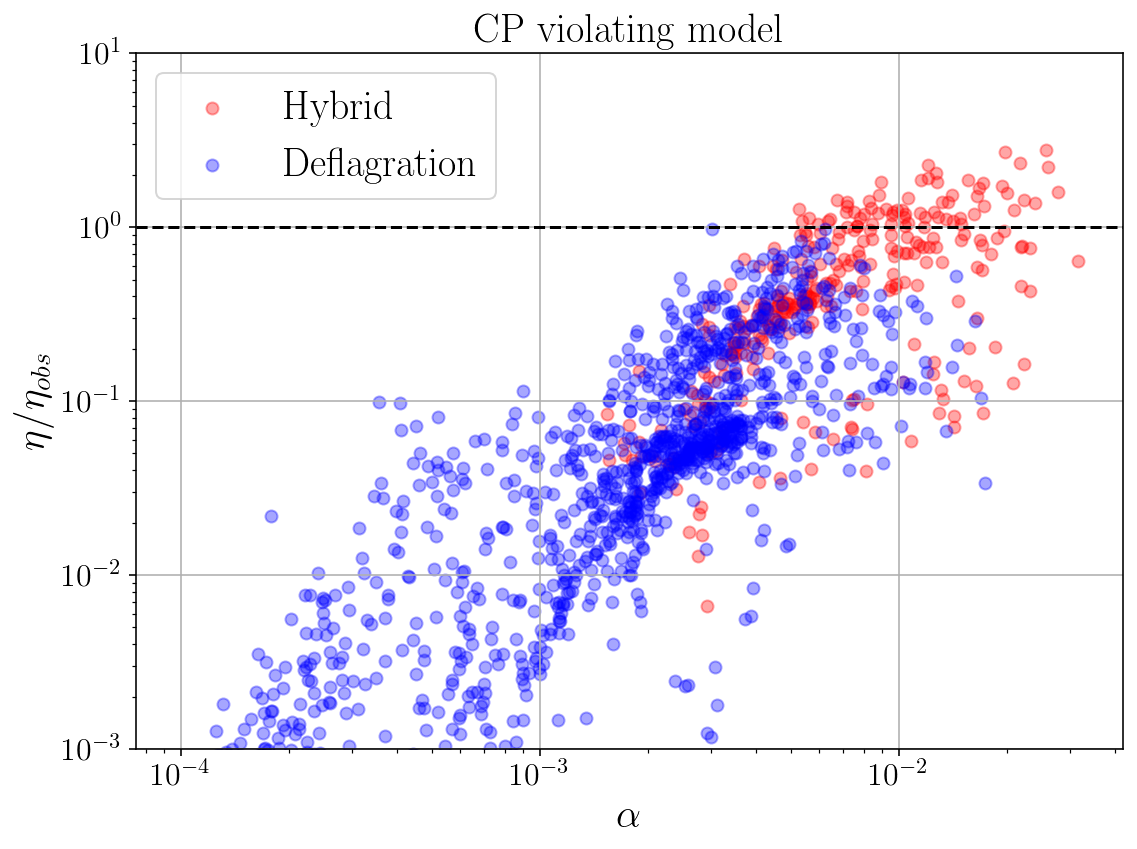

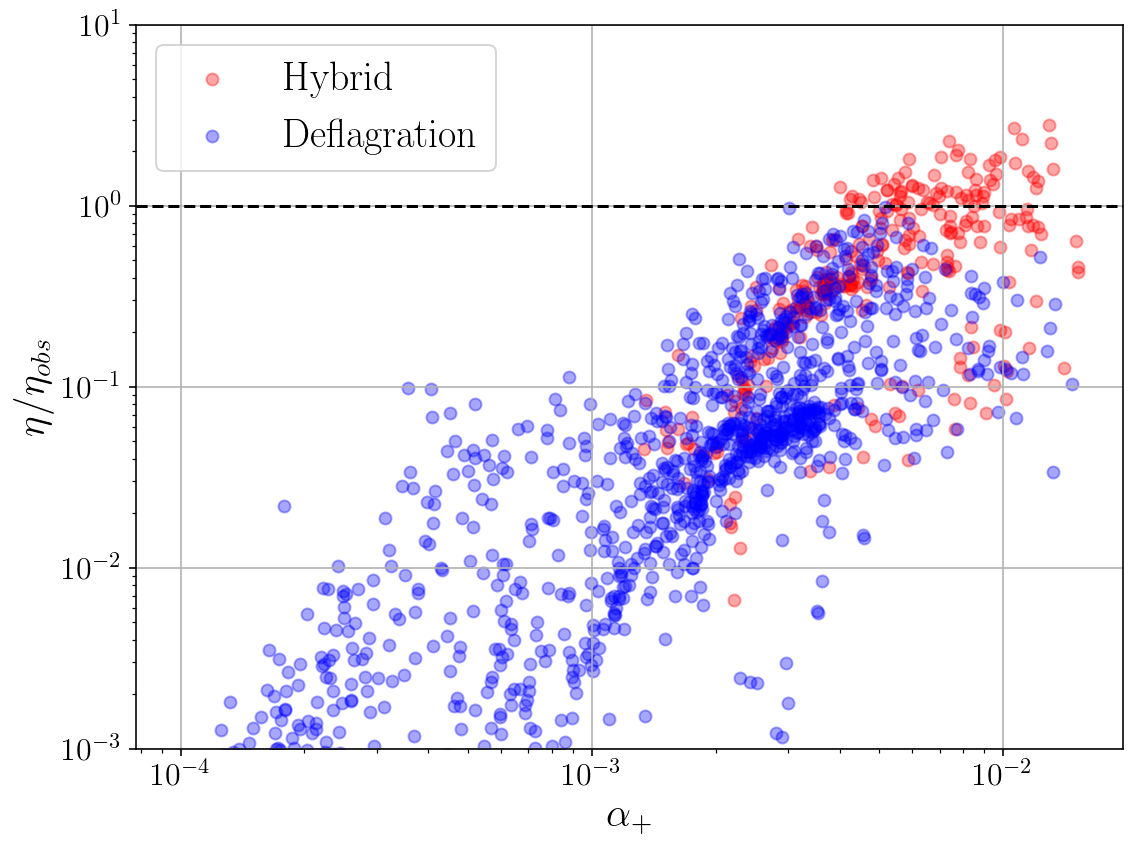

In [8]:
df=pd.read_csv("SCANS/results_cluster.csv",index_col=[0])
df=df[df.EWSBtree==True]
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
df=df[df.h_low_0>20]
df=df.drop(1455)

###After LHC limits
df=pd.read_csv("SCANS/CP_violating_results_filtered.csv",index_col=[0])


plt.scatter(df[df.vw>cs].alpha_0,df[df.vw>cs].eta_BAU,color="red",alpha=.35,label="Hybrid")
plt.scatter(df[df.vw<=cs].alpha_0,df[df.vw<=cs].eta_BAU,color="b",alpha=.35,label="Deflagration")

plt.ylim(1e-3,10)
plt.axhline(y=1,linestyle="--",c="k")
plt.legend(loc="best",prop={'size': label_size})
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$\\alpha$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.title("CP violating model",size=label_size)
plt.tight_layout()
plt.savefig('SCANS/BAU_plots/PLOT2.pdf', dpi=300)
plt.show()

plt.scatter(df[df.vw>cs].alpha_p,df[df.vw>cs].eta_BAU,color="red",alpha=.35,label="Hybrid")
plt.scatter(df[df.vw<=cs].alpha_p,df[df.vw<=cs].eta_BAU,color="b",alpha=.35,label="Deflagration")

plt.ylim(1e-3,10)
plt.axhline(y=1,linestyle="--",c="k")
plt.legend(loc="best",prop={'size': label_size})
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$\\alpha_+$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.tight_layout()
plt.savefig('SCANS/BAU_plots/PLOT3.pdf', dpi=300)
plt.show()

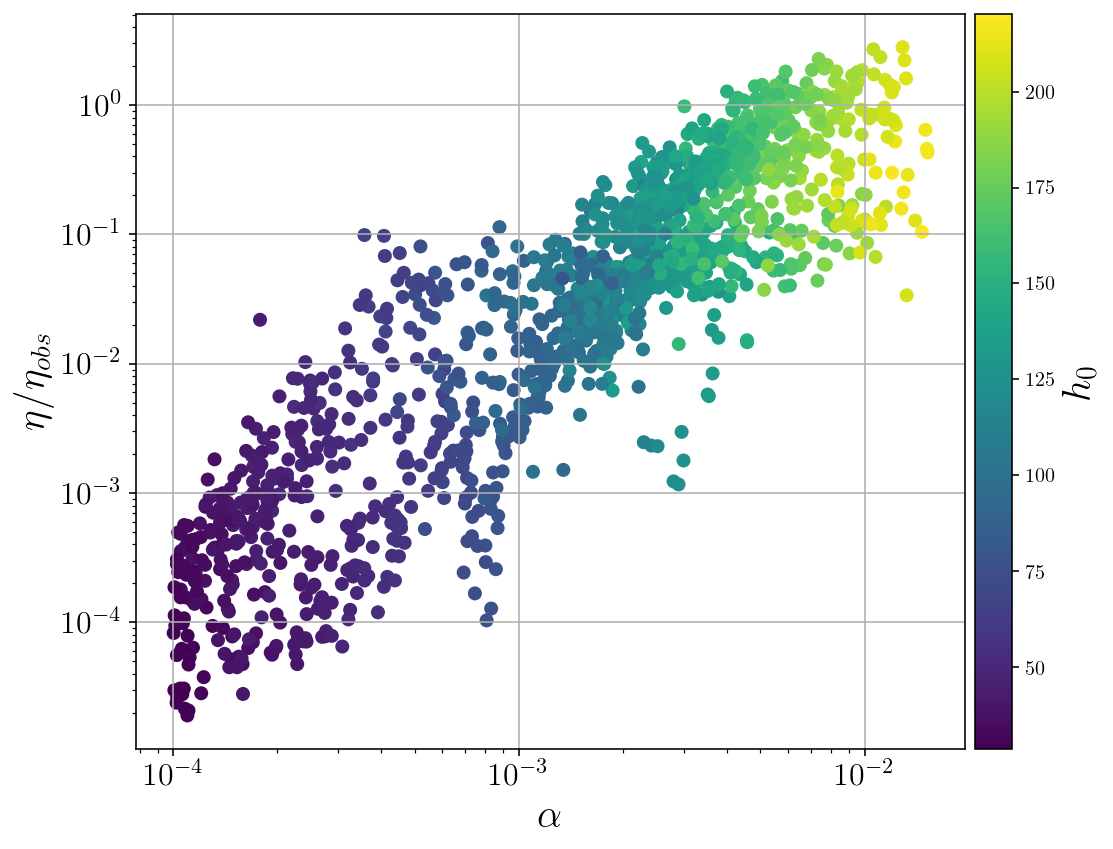

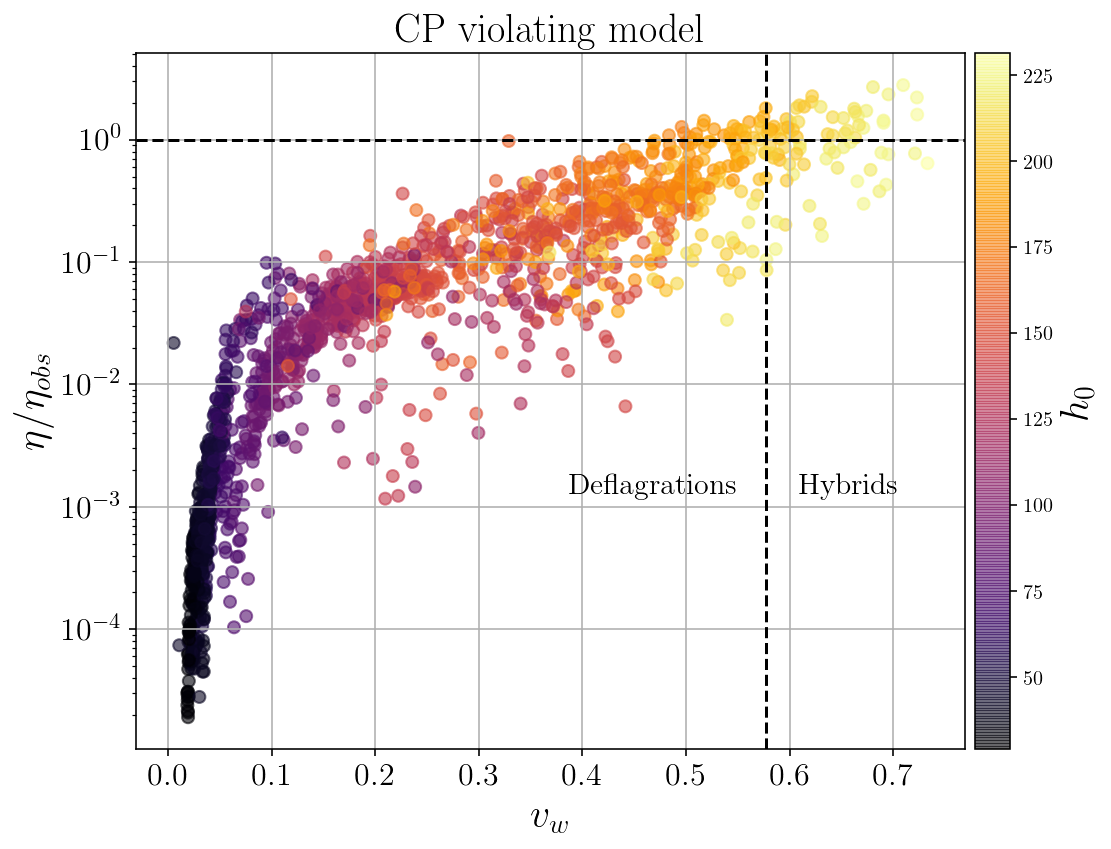

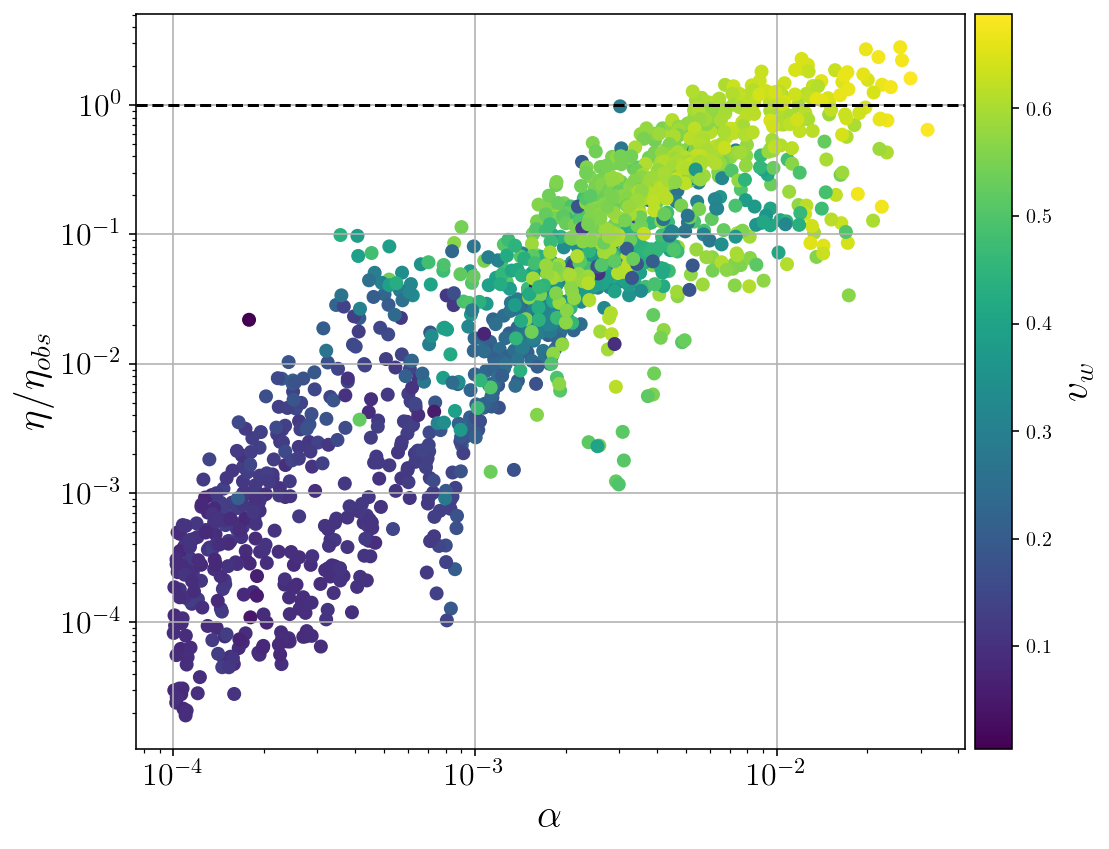

In [10]:
df=pd.read_csv("SCANS/results_cluster.csv",index_col=[0])
df=df[df.EWSBtree==True]
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
df=df[df.h_low_0>20]
df=df.drop(1455)

###After LHC limits
df=pd.read_csv("SCANS/CP_violating_results_filtered.csv",index_col=[0])


plt.scatter(df.alpha_p,df.eta_BAU,c=df.h0)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$h_0$", size=label_size, weight='bold')
#plt.axhline(y=d_eEDM_bound,linestyle="--",c="k")
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$\\alpha$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.tight_layout()
plt.savefig('SCANS/BAU_plots/PLOT4.pdf', dpi=300)
plt.show()




plt.scatter(df.vwf_0,df.eta_BAU,c=df.h_low_0,alpha=.6,cmap="inferno")
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$h_0$", size=label_size, weight='bold')
plt.axhline(y=1,linestyle="--",c="k")
plt.axvline(x=cs,linestyle="--",c="k",label="$c_s$")

#plt.clim(10,300)
#plt.axhline(y=d_eEDM_bound,linestyle="--",c="k")
#plt.xscale("log")
plt.yscale("log")
#plt.xlim(1e-1,1)
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$v_w$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
plt.figtext(.5, .42, "Deflagrations", fontsize=15)
plt.figtext(.7, .42, "Hybrids", fontsize=15)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.title("CP violating model",size=label_size)
plt.tight_layout()
plt.savefig('SCANS/BAU_plots/PLOT5.pdf', dpi=300)
plt.show()

plt.scatter(df.alpha_0,df.eta_BAU,c=df.vw)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$v_w$", size=label_size, weight='bold')
plt.axhline(y=1,linestyle="--",c="k")
#plt.clim(10,300)
#plt.axhline(y=d_eEDM_bound,linestyle="--",c="k")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(2.4e-4,)
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$\\alpha$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
plt.tight_layout()
plt.savefig('SCANS/BAU_plots/PLOT6.pdf', dpi=300)
plt.show()

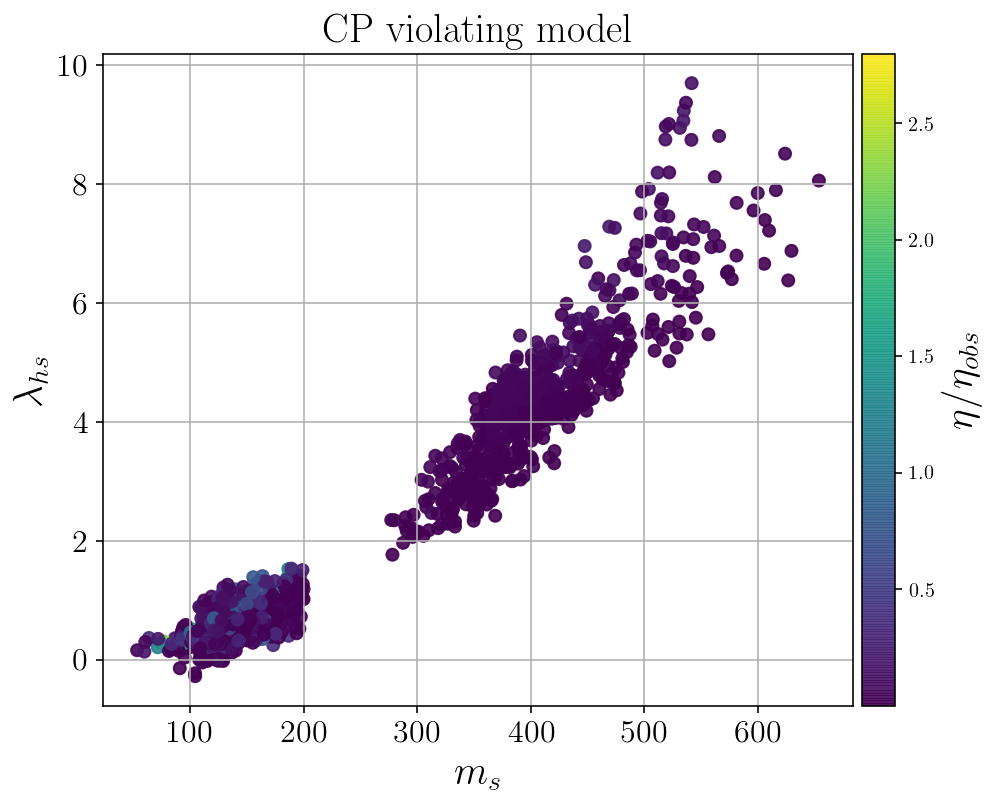

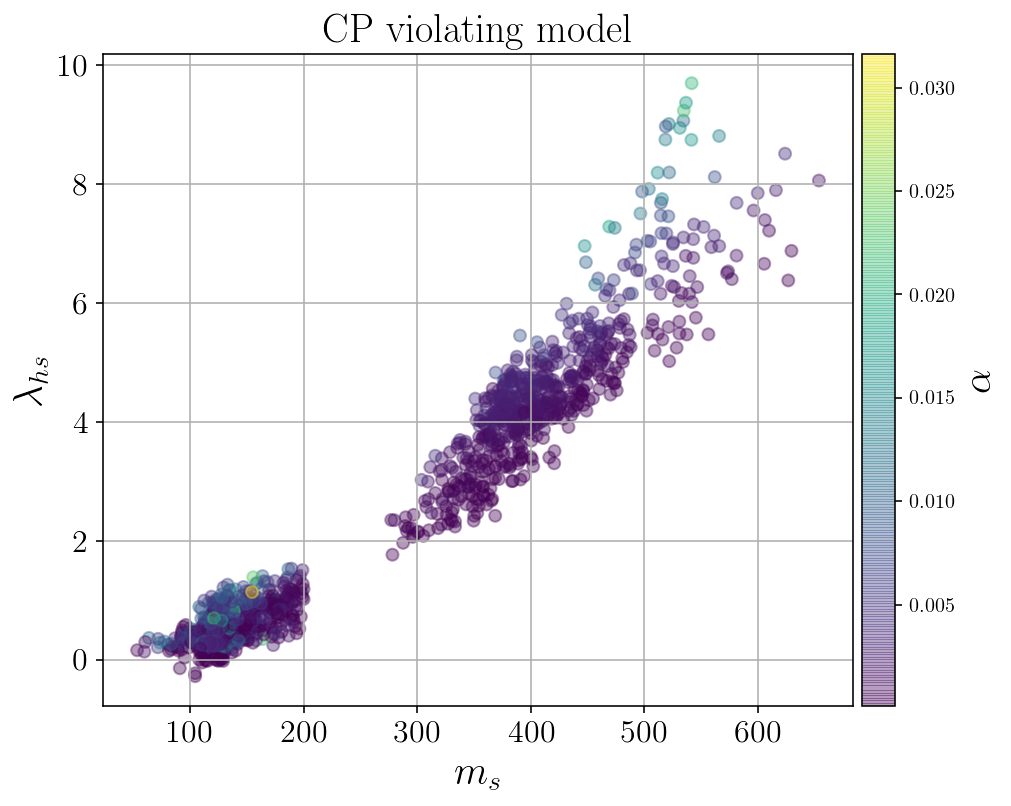

In [11]:
df=pd.read_csv("SCANS/results_cluster.csv",index_col=[0])
df=df[df.EWSBtree==True]
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
df=df[df.h_low_0>20]
df=df.drop(1455)

###After LHC limits
df=pd.read_csv("SCANS/CP_violating_results_filtered.csv",index_col=[0])


plt.scatter(df.ms,df.lammix,c=df.eta_BAU,alpha=.9)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\eta/\eta_{obs}$", size=label_size, weight='bold')
#plt.clim(1e-3,1)
plt.grid(True)
plt.xlabel("$m_s$",size=label_size)
plt.ylabel("$\\lambda_{hs}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.title("CP violating model",size=label_size)
plt.savefig('SCANS/BAU_plots/PLOT7.pdf', dpi=300)
plt.show()

plt.scatter(df.ms,df.lammix,c=df.alpha_0,alpha=.4)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')
#plt.clim(1e-4,.01)
plt.grid(True)
plt.xlabel("$m_s$",size=label_size)
plt.ylabel("$\\lambda_{hs}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.title("CP violating model",size=label_size)
plt.savefig('SCANS/BAU_plots/PLOT8.pdf', dpi=300)
plt.show()


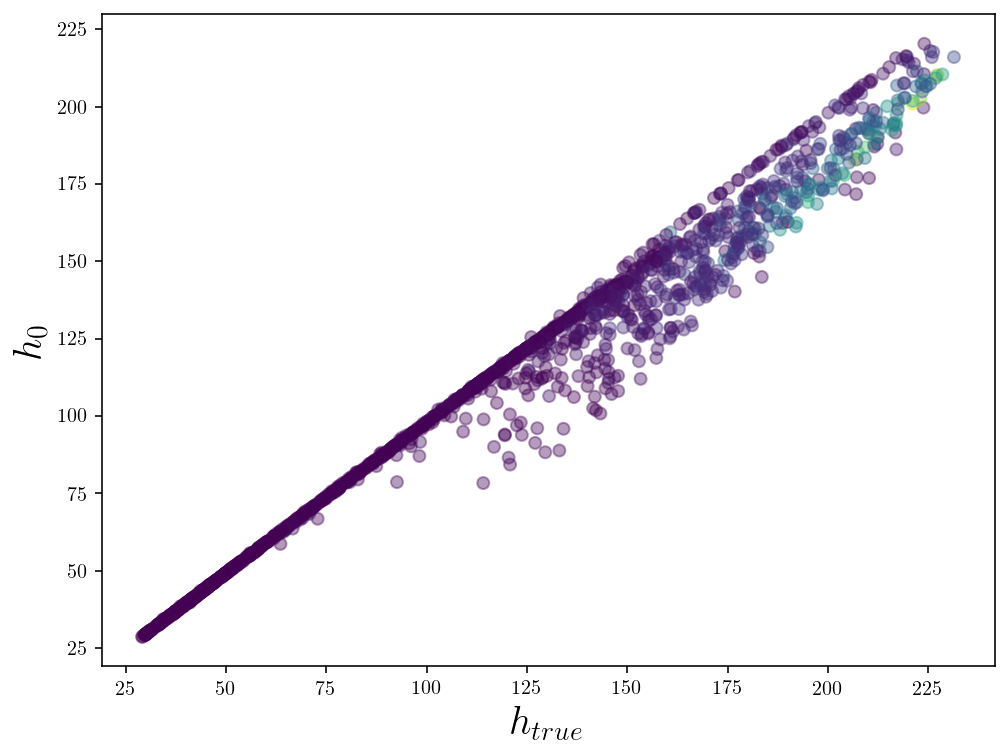

In [12]:
df=pd.read_csv("SCANS/results_cluster.csv",index_col=[0])
df=df[df.EWSBtree==True]
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
df=df[df.h_low_0>20]
df=df.drop(1455)

###After LHC limits
df=pd.read_csv("SCANS/CP_violating_results_filtered.csv",index_col=[0])


plt.scatter(df.h_low_0,df.h0,c=df.eta_BAU,alpha=.4)
plt.xlabel("$h_{true}$",size=label_size)
plt.ylabel("$h_0$",size=label_size)
plt.savefig('SCANS/BAU_plots/PLOT9.pdf', dpi=300)
plt.show()

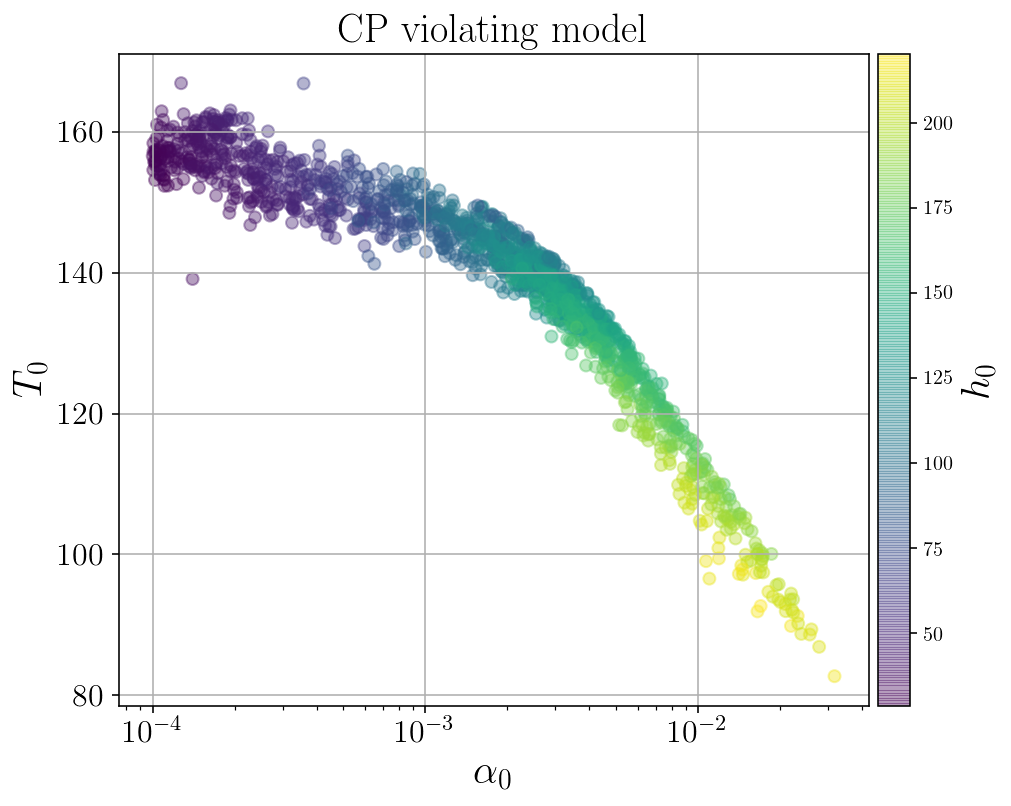

In [13]:
df=pd.read_csv("SCANS/results_cluster.csv",index_col=[0])
df=df[df.EWSBtree==True]
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
df=df[df.h_low_0>20]
df=df.drop(1455)

###After LHC limits
df=pd.read_csv("SCANS/CP_violating_results_filtered.csv",index_col=[0])


plt.scatter(df.alpha_0,df.Tnuc_0,c=df.h0,alpha=.4)
plt.xscale("log")
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$h_0$", size=label_size, weight='bold')
#plt.clim(1e-4,.01)
plt.grid(True)
plt.xlabel("$\\alpha_0$",size=label_size)
plt.ylabel("$T_{0}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.title("CP violating model",size=label_size)
plt.savefig('SCANS/BAU_plots/PLOT10.pdf', dpi=300)
plt.show()

In [10]:
# df0=pd.read_csv("SCANS/BAU/sols_fullmodel_0.csv",index_col=[0])
# df1=pd.read_csv("SCANS/BAU/sols_fullmodel_1.csv",index_col=[0])
# df2=pd.read_csv("SCANS/BAU/sols_fullmodel_2.csv",index_col=[0])
# df=pd.concat([df0,df1,df2])
# 
# 
# df=df[df["vel_converged"]==True]
# df=df[df.Lam_CP>df.ms]
# df=df[df.Lam_CP>v]
# df=df[df.Lam_CP>abs(df.mu3)]
# df=df[df.Lam_CP>abs(df.muhs)]
# df=df[df.Lam_CP>abs(df.u)]
# df=df[df.num_FOPT==1]
# 

#df.to_csv("SCANS/isEWSB.csv")

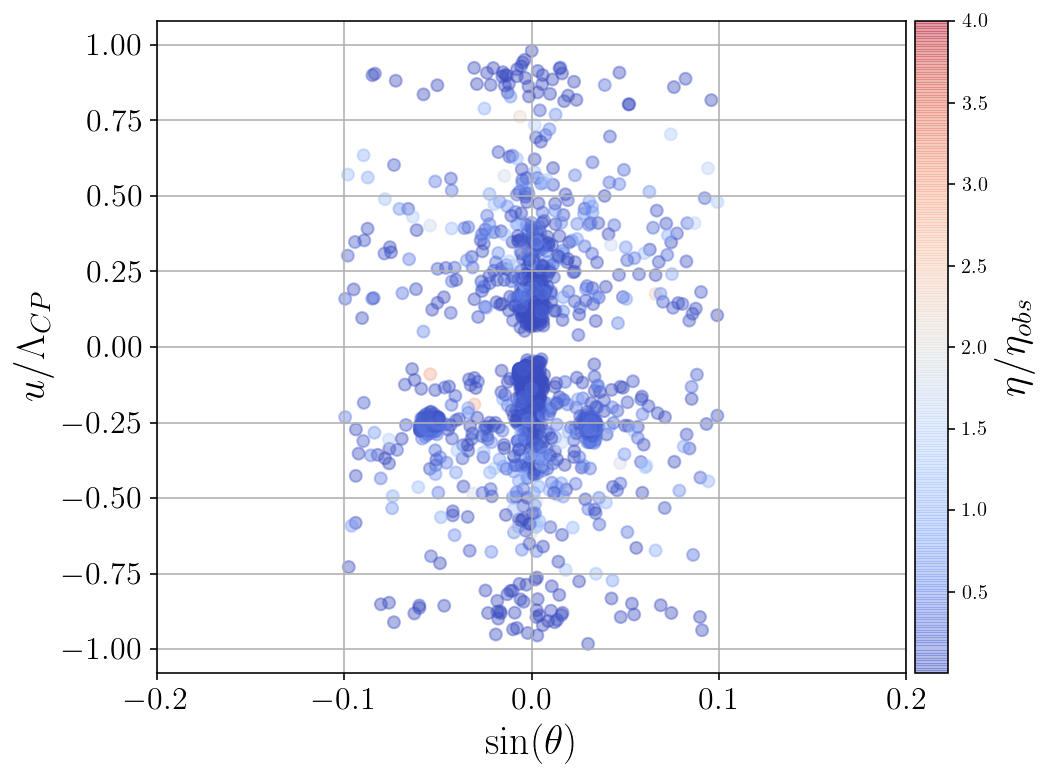

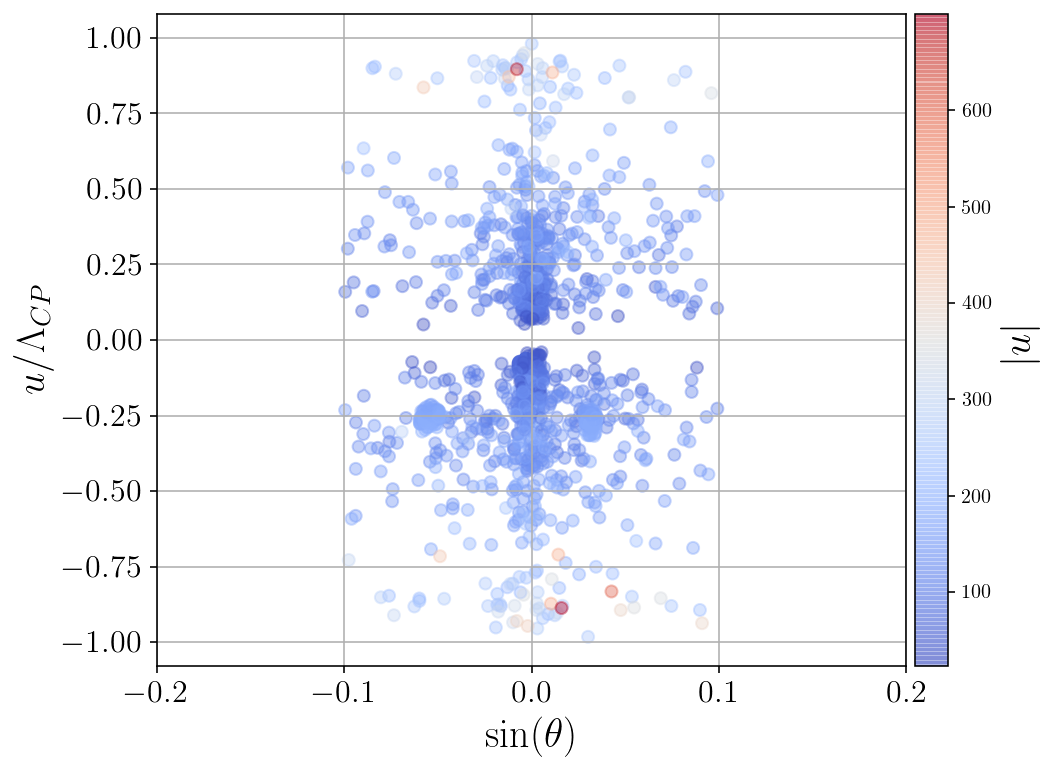

In [14]:
df=pd.read_csv("SCANS/results_cluster.csv",index_col=[0])
df=df[df.EWSBtree==True]
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
df=df[df.h_low_0>20]
df=df.drop(1455)


###After LHC limits
df=pd.read_csv("SCANS/CP_violating_results_filtered.csv",index_col=[0])


plt.scatter(np.sin(df.theta),df.u/df.Lam_CP,c=df.eta_BAU,alpha=.4,cmap="coolwarm")
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\eta/\eta_{obs}$", size=label_size, weight='bold')
plt.clim(1e-4,4)
plt.grid(True)
plt.xlim(-.2,.2)
plt.xlabel("$\sin(\\theta)$",size=label_size)
plt.ylabel("$u/\\Lambda_{CP}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.locator_params(axis="x",nbins=4)
plt.yticks(fontsize=thick_size)
plt.savefig('SCANS/BAU_plots/PLOT11.pdf', dpi=300)
plt.show()



plt.scatter(np.sin(df.theta),df.u/df.Lam_CP,c=abs(df.u),alpha=.4,cmap=plt.get_cmap("coolwarm",500))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$|u|$", size=label_size, weight='bold')
#plt.clim(1e-3,1)
plt.grid(True)
plt.xlim(-.2,.2)
plt.xlabel("$\sin(\\theta)$",size=label_size)
plt.ylabel("$u/\\Lambda_{CP}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.locator_params(axis="x",nbins=4)
plt.yticks(fontsize=thick_size)
plt.savefig('SCANS/BAU_plots/PLOT12.pdf', dpi=300)
plt.show()

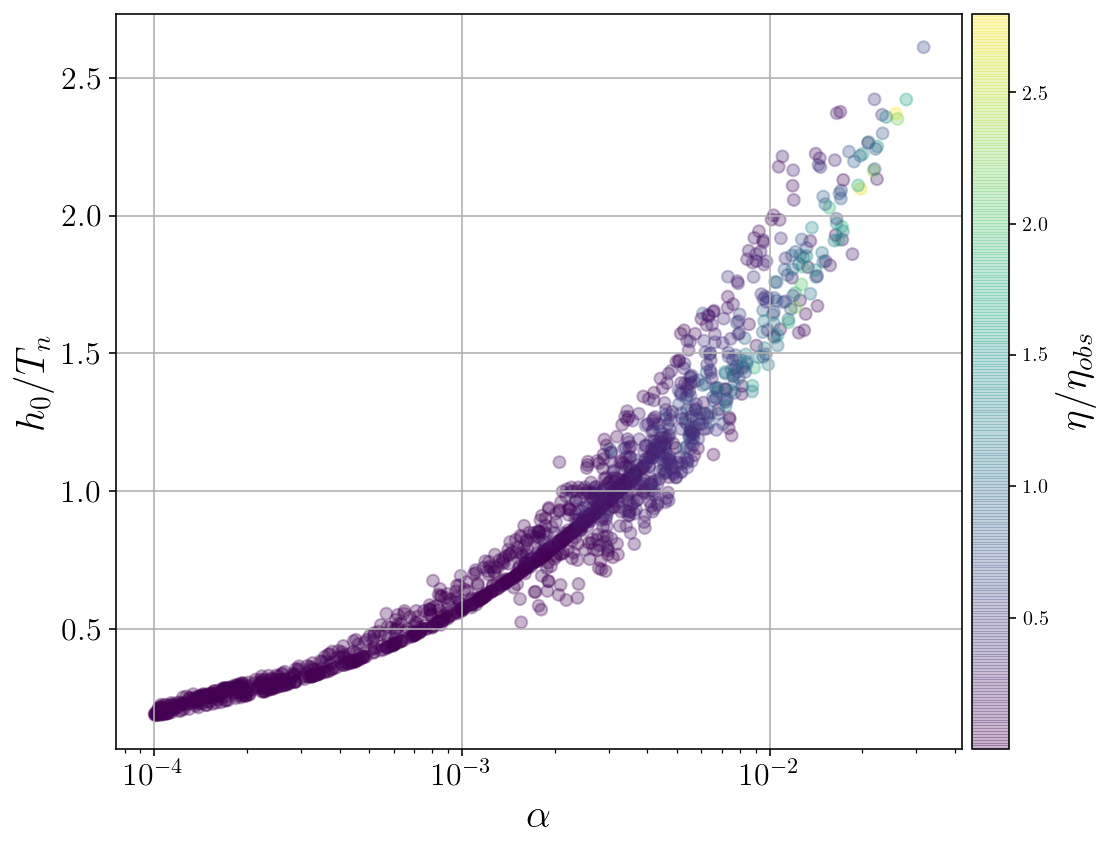

In [15]:
df=pd.read_csv("SCANS/results_cluster.csv",index_col=[0])
df=df[df.EWSBtree==True]
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
df=df[df.h_low_0>20]
df=df.drop(1455)

###After LHC limits
df=pd.read_csv("SCANS/CP_violating_results_filtered.csv",index_col=[0])


df["sphaleron"]=df.h0/df.Tnuc_0

plt.scatter(df.alpha_max,df.sphaleron,c=df.eta_BAU,alpha=0.3)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\eta/\\eta_{obs}$", size=label_size, weight='bold')
#plt.clim(1e-1,2)
plt.xscale("log")
#plt.xlim(4e-4,4e-2)
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$\\alpha$",size=label_size)
plt.ylabel("$h_0/T_n$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
plt.tight_layout()
plt.savefig('SCANS/BAU_plots/PLOT13.pdf', dpi=300)
plt.show()


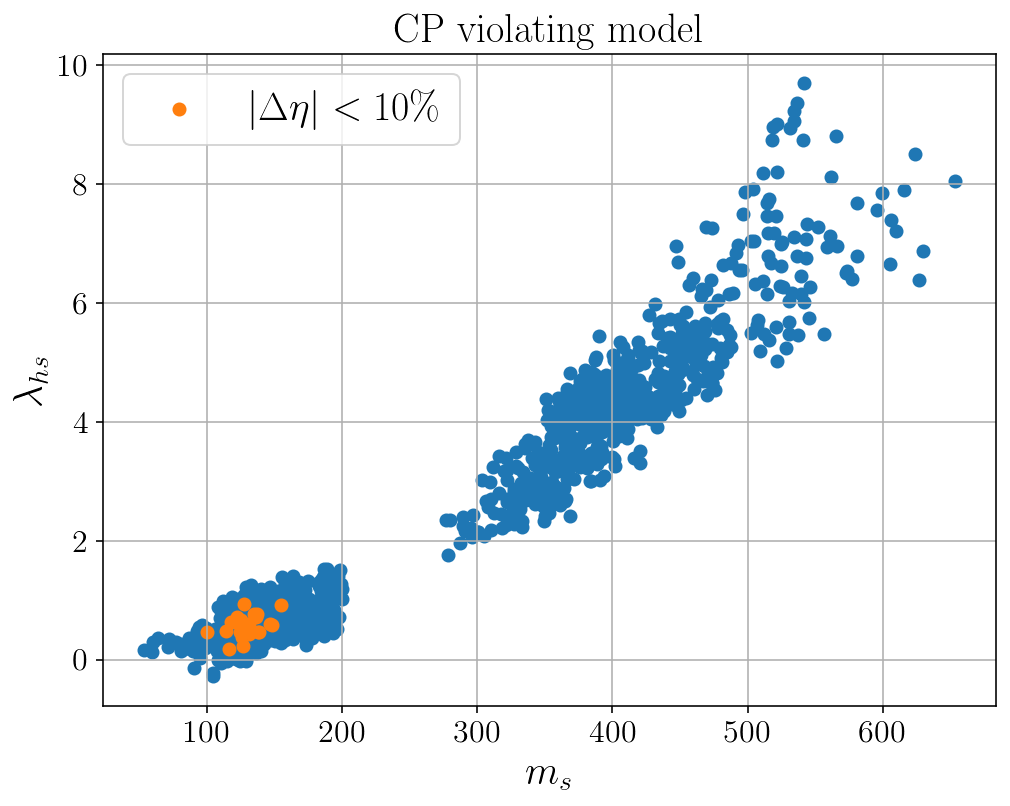

In [17]:
df=pd.read_csv("SCANS/results_cluster.csv",index_col=[0])
df=df[df.EWSBtree==True]
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
df=df[df.h_low_0>20]
df=df.drop(1455)

###After LHC limits
df=pd.read_csv("SCANS/CP_violating_results_filtered.csv",index_col=[0])


plt.scatter(df.ms,df.lammix)
plt.scatter(df[abs(df.eta_BAU-1)<.1].ms,
            df[abs(df.eta_BAU-1)<.1].lammix,label="$|\Delta\\eta|<10 \%$")
plt.legend(loc="best",prop={'size': label_size})
#plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\eta/\eta_{obs}$", size=label_size, weight='bold')
#plt.clim(1e-3,1)
plt.grid(True)
plt.xlabel("$m_s$",size=label_size)
plt.ylabel("$\\lambda_{hs}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.title("CP violating model",size=label_size)
plt.savefig('SCANS/BAU_plots/PLOT14.pdf', dpi=300)
plt.show()

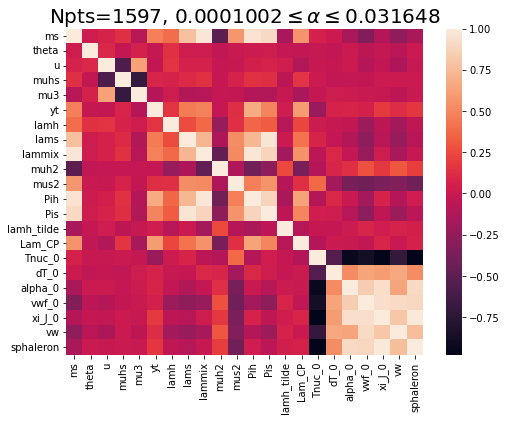

In [3]:
import numpy as np
from cosmoTransitions import generic_potential_1
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.integrate as integrate
import random
from scipy import interpolate, special
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 6)  #set default figure size
pd.set_option('display.max_rows', None)
thick_size=16
label_size=20
v=246.2


###After LHC limits
df=pd.read_csv("SCANS/CP_violating_results_filtered.csv",index_col=[0])
df["sphaleron"]=df.h0/df.Tnuc_0


columns_relevant=['ms', 'theta', 'u', 'muhs', 'mu3', 'yt', 'lamh', 'lams', 'lammix',
                  'muh2', 'mus2', 'Pih', 'Pis', 'lamh_tilde', 'Lam_CP',
                 'Tnuc_0', 'dT_0', 'alpha_0', 'vwf_0', 'xi_J_0',
                 'vw',"sphaleron"]

sns.heatmap(df[columns_relevant].corr())
title="Npts="+str(len(df))+", "+str(round(df.alpha_max.min(),7))+"$\leq \\alpha \leq$"+str(round(df.alpha_max.max(),6))
plt.title(title,size=label_size)
plt.show()


In [7]:
df=pd.read_csv("SCANS/results_cluster.csv",index_col=[0])
df=df[df.EWSBtree==True]
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
df=df[df.h_low_0>20]
df=df.drop(1455)


###After LHC limits
df=pd.read_csv("SCANS/CP_violating_results_filtered.csv",index_col=[0])

df["sphaleron"]=df.h0/df.Tnuc_0



corr_columns=['ms', 'theta', 'u', 'muhs', 'mu3', 'yt', 'lamh', 'lams', 'lammix',
              'muh2', 'mus2', 'Pih', 'Pis', 'lamh_tilde', 'Lam_CP', 
              'h_low_0', 's_low_0', 'h_high_0', 's_high_0',
              'Tnuc_0', 'dT_0', 'alpha_0', 'vwf_0', 'xi_J_0', 'alpha_max', 'dT_max', 
              'vw', 'Lh', 'h0', 'Ls', 'ds', 'shigh', 'slow', 'alpha_p', 'vm', 'vp', 'xi_s', 'Tp/TN', 'Tc',
              'LT', 'eta_BAU',"sphaleron"]
df_correlation=df[corr_columns].corr()
abs(df_correlation["lamh"]).sort_values()

shigh         0.008168
dT_0          0.010093
dT_max        0.010093
s_high_0      0.011846
Tnuc_0        0.017550
mu3           0.020245
h_high_0      0.023858
alpha_max     0.028869
alpha_0       0.028869
alpha_p       0.032478
Lh            0.038939
Ls            0.039741
sphaleron     0.048871
xi_J_0        0.057610
h0            0.064720
LT            0.071477
muhs          0.072522
Tc            0.075275
lamh_tilde    0.088053
h_low_0       0.102950
eta_BAU       0.127592
ds            0.137144
mus2          0.137821
xi_s          0.144702
theta         0.149014
slow          0.150299
u             0.153082
s_low_0       0.153291
yt            0.156253
Tp/TN         0.166633
vp            0.169020
vm            0.179509
vw            0.181297
vwf_0         0.208184
muh2          0.230593
Lam_CP        0.239397
lams          0.261665
Pis           0.323550
Pih           0.360347
lammix        0.376374
ms            0.391474
lamh          1.000000
Name: lamh, dtype: float64

In [6]:
df=pd.read_csv("SCANS/results_cluster.csv",index_col=[0])
df=df[df.EWSBtree==True]
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df=df[df.num_FOPT==1]
df=df[df.h_low_0>20]
df1=df.drop(1455)


###After LHC limits
df=pd.read_csv("SCANS/CP_violating_results_filtered.csv",index_col=[0])
df["sphaleron"]=df.h0/df.Tnuc_0


(len(df1)-len(df))/len(df)
             
             

0.24358171571696932

In [142]:
df1=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new1.csv",index_col=[0])
df2=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new2.csv",index_col=[0])
df3=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new3.csv",index_col=[0])
df4=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new4.csv",index_col=[0])
df5=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new5.csv",index_col=[0])
df6=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new6.csv",index_col=[0])
df7=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new7.csv",index_col=[0])
df8=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new8.csv",index_col=[0])
df9=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new9.csv",index_col=[0])
df10=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new10.csv",index_col=[0])
df11=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new11.csv",index_col=[0])
df12=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new12.csv",index_col=[0])
df13=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new13.csv",index_col=[0])
df14=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new14.csv",index_col=[0])
df15=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new15.csv",index_col=[0])
df16=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new16.csv",index_col=[0])
df17=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new17.csv",index_col=[0])
df18=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new18.csv",index_col=[0])
df19=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new19.csv",index_col=[0])
df20=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new20.csv",index_col=[0])
df21=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new21.csv",index_col=[0])
df22=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new22.csv",index_col=[0])
df23=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new23.csv",index_col=[0])
df24=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new24.csv",index_col=[0])
df25=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new25.csv",index_col=[0])
df26=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new26.csv",index_col=[0])
df27=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new27.csv",index_col=[0])
df28=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new28.csv",index_col=[0])
df29=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new29.csv",index_col=[0])
df30=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new30.csv",index_col=[0])
df31=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new31.csv",index_col=[0])
df32=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new32.csv",index_col=[0])
df33=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new33.csv",index_col=[0])
df34=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new34.csv",index_col=[0])
df35=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new35.csv",index_col=[0])
df36=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new36.csv",index_col=[0])
df37=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new37.csv",index_col=[0])
df38=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new38.csv",index_col=[0])
df39=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new39.csv",index_col=[0])
df40=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new40.csv",index_col=[0])
df41=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new41.csv",index_col=[0])
df42=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new42.csv",index_col=[0])
df43=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new43.csv",index_col=[0])
df44=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new44.csv",index_col=[0])
df45=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new45.csv",index_col=[0])
df46=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new46.csv",index_col=[0])
df47=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new47.csv",index_col=[0])
df48=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new48.csv",index_col=[0])
df49=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new49.csv",index_col=[0])
df50=pd.read_csv("SCANS/scan_cluster_3/Small_angle_region_2/full_model_vw_solutions_new50.csv",index_col=[0])

df_total=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,
                    df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,
                    df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,
                    df31,df32,df33,df34,df35,df36,df37,df38,df39,df40,
                    df41,df42,df43,df44,df45,df46,df47,df48,df49,df50])
df_total=df_total[df_total["vel_converged"]==True]
#df_total=df_total[df_total["num_FOPT"]==1]

df=df_total



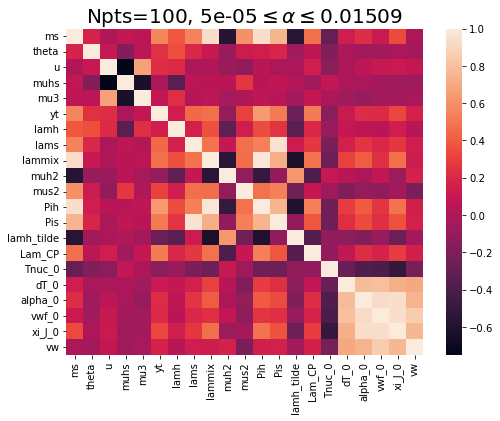

In [1]:
import numpy as np
from cosmoTransitions import generic_potential_1
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.integrate as integrate
import random
from scipy import interpolate, special
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 6)  #set default figure size
pd.set_option('display.max_rows', None)
thick_size=16
label_size=20


df1=pd.read_csv("SCANS/scan_cluster_3/small_angle_results_1.csv",index_col=[0])
df2=pd.read_csv("SCANS/scan_cluster_3/small_angle_results_0.csv",index_col=[0])

df=pd.concat([df1,df2])


columns_relevant=['ms', 'theta', 'u', 'muhs', 'mu3', 'yt', 'lamh', 'lams', 'lammix',
                  'muh2', 'mus2', 'Pih', 'Pis', 'lamh_tilde', 'Lam_CP',
                 'Tnuc_0', 'dT_0', 'alpha_0', 'vwf_0', 'xi_J_0',
                 'vw']

sns.heatmap(df[columns_relevant].corr())
title="Npts="+str(len(df))+", "+str(round(df.alpha_max.min(),5))+"$\leq \\alpha \leq$"+str(round(df.alpha_max.max(),6))
plt.title(title,size=label_size)
plt.show()



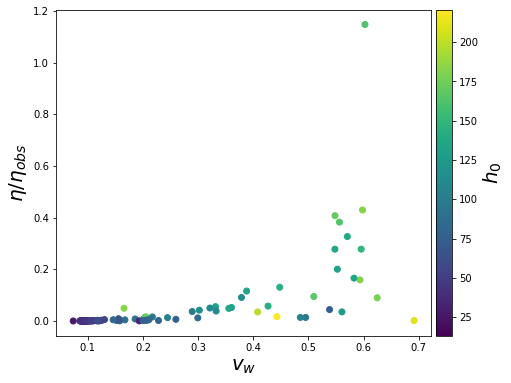

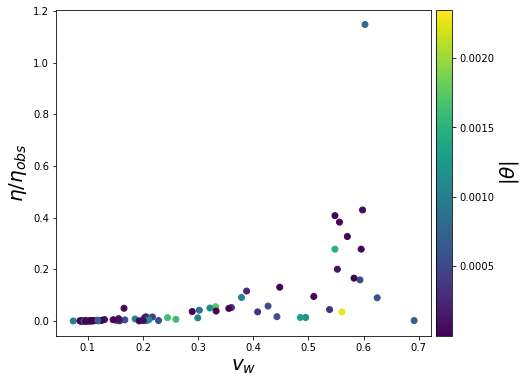

In [2]:
plt.scatter(df.vw,df.eta_BAU,c=df.h0)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$h_0$", size=label_size, weight='bold')
plt.xlabel("$v_w$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
plt.show()

plt.scatter(df.vw,df.eta_BAU,c=abs(df.theta))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$|\\theta|$", size=label_size, weight='bold')
plt.xlabel("$v_w$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
plt.show()

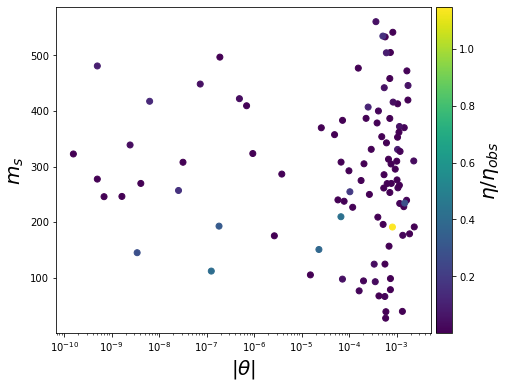

In [3]:
plt.scatter(abs(df.theta),df.ms,c=df.eta_BAU)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\eta/\\eta_{obs}$", size=label_size, weight='bold')
plt.xlabel("$|\\theta|$",size=label_size)
plt.ylabel("$m_s$",size=label_size)
plt.xscale("log")
plt.show()